# VencoPy Tutorial 5

This tutorial aims to give a more in depth overview into the flexEstimator class and showcases some features that can be customised.

In [43]:
import pandas as pd

from pathlib import Path
from typing import Union

from vencopy.core.dataparsers import parse_data
from vencopy.core.flexestimators import FlexEstimator
from vencopy.core.gridmodellers import GridModeller
from vencopy.core.diarybuilders import DiaryBuilder
from vencopy.core.profileaggregators import ProfileAggregator
from vencopy.utils.utils import create_file_name, write_out,load_configs, create_output_folders


In [44]:
basePath = Path.cwd().parent /'vencopy'
configs = load_configs(basePath)
create_output_folders(configs=configs)

# Adapt relative paths in config for tutorials
configs['dev_config']['global']['relative_path']['parse_output'] = Path.cwd() / configs['dev_config']['global']['relative_path']['parse_output']
configs['dev_config']['global']['relative_path']['diary_output'] = Path.cwd() / configs['dev_config']['global']['relative_path']['diary_output']
configs['dev_config']['global']['relative_path']['grid_output'] = Path.cwd()/ configs['dev_config']['global']['relative_path']['grid_output']
configs['dev_config']['global']['relative_path']['flex_output'] = Path.cwd() / configs['dev_config']['global']['relative_path']['flex_output']
configs['dev_config']['global']['relative_path']['aggregator_output'] = Path.cwd().parent / configs['dev_config']['global']['relative_path']['aggregator_output']
configs['dev_config']['global']['relative_path']['processor_output'] = Path.cwd() / configs['dev_config']['global']['relative_path']['processor_output']

# Set reference dataset
datasetID = 'MiD17'

# Modify the localPathConfig file to point to the .csv file in the sampling folder in the tutorials directory where the dataset for the tutorials lies.
configs["user_config"]["global"]["absolute_path"]["vencopy_root"] = Path.cwd()
configs['user_config']['global']['absolute_path'][datasetID] = Path.cwd() /'data_sampling'

# Similarly we modify the datasetID in the global config file
configs['dev_config']['global']['files'][datasetID]['trips_data_raw'] = datasetID + '.csv'


# We also modify the parseConfig by removing some of the columns that are normally parsed from the MiD, which are not available in our semplified test dataframe
del configs['dev_config']['dataparsers']['data_variables']['household_id']
del configs['dev_config']['dataparsers']['data_variables']['person_id']



## FlexEstimator config file

The FlexEstimator config file contains the technical specifications..

In [45]:
configs['user_config']['flexestimators']

{'filter_fuel_need': True,
 'battery_capacity': 50,
 'electric_consumption': 18.0,
 'fuel_consumption': 1.0,
 'start_soc': 0.5,
 'maximum_soc': 0.97,
 'minimum_soc': 0.03,
 'max_iterations': 10,
 'epsilon_battery_level': 0.0001}

## _FlexEstimator_ class

To use the FlexEstimator class, we first need to run the DataParses as well as the GridModeller as they have an argument to the FlexEstimator class.

In [46]:
basePath = Path.cwd() /'vencopy'

data = parse_data(configs=configs)
data= data.process()

grid = GridModeller(configs=configs, activities=data)
grid.assign_grid()


Generic file parsing properties set up.
Starting to retrieve local data file from c:\Users\jagm_li\Documents\vencopy_internal\vencopy\tutorials\data_sampling\MiD17.csv.
Finished loading 2124 rows of raw data of type .csv.
Running in debug mode.
Finished harmonization of variables.
Finished harmonization of ID variables.
Starting filtering, applying 8 filters.
All filters combined yielded that a total of 857 trips are taken into account.
This corresponds to 40.34839924670433 percent of the original data.
Completed park timestamp adjustments.
From 11791.33 km total mileage in the dataset after filtering, 0.0 % were cropped because they corresponded to split-trips from overnight trips.
Finished activity composition with 857 trips and 854 parking activites.
Parsing MiD dataset completed.
Starting with charge connection replacement of location purposes.
Grid connection assignment complete.


Now we can display results on the distance all the trips have

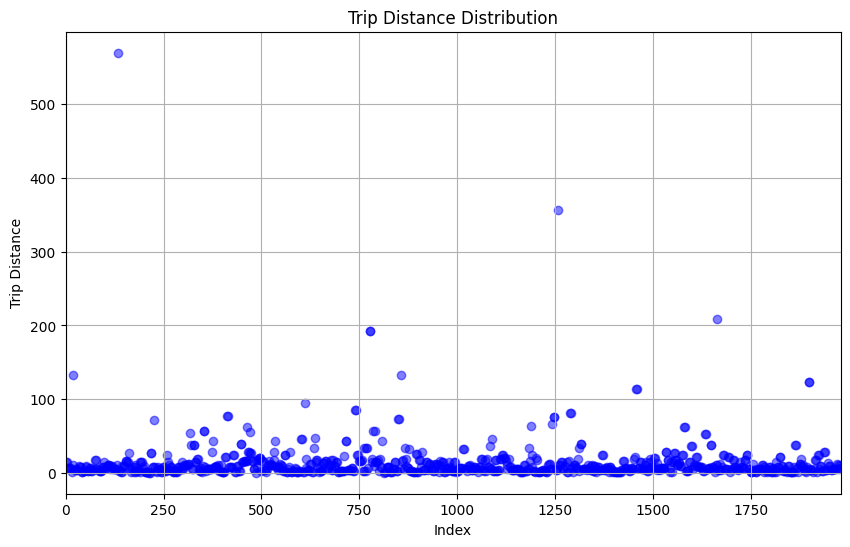

In [47]:
import matplotlib.pyplot as plt

# Filter out rows where trip_distance is not NaN
filtered_df = data.dropna(subset=['trip_distance'])

max_index = filtered_df['index'].max()

# Plot trip distances
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df.index, filtered_df['trip_distance'], color='blue', alpha=0.5)
plt.title('Trip Distance Distribution')
plt.xlabel('Index')
plt.ylabel('Trip Distance')
plt.grid(True)
plt.xlim(0, max_index)
plt.show()

In [48]:
# Estimate charging flexibility based on driving profiles and charge connection
flex = FlexEstimator(configs=configs, activities=grid.activities)
flex.estimate_technical_flexibility_through_iteration()


Starting maximum battery level calculation.
Calculating maximum battery level for first activities.
Calculating maximum battery level for act 1.
Calculating maximum battery level for act 2.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:244: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  first_park_activities.loc[:, "max_battery_level_end_unlimited"] = (
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  first_park_activities.loc[:, "max_battery_level_end"] = first_park_activities.loc[:,
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:253: FutureWarning: In a future version, `df.iloc[:,

Calculating maximum battery level for act 3.
Calculating maximum battery level for act 4.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:443: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_park_activities.loc[multi_index_park, "max_battery_level_start"] = indeces_previous_trip_activities.loc[
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:450: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_park_activities.loc[multi_index_park, "max_battery_level_end"] = indeces_park_activities[
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimato

Calculating maximum battery level for act 5.
Calculating maximum battery level for act 6.
Calculating maximum battery level for act 7.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:346: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_battery_level_end_unlimited"] = (
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:350: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_battery_level_end"] = indeces_trip_activities.loc[
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning

Calculating maximum battery level for act 8.
Calculating maximum battery level for act 9.
Calculating maximum battery level for act 10.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:343: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_battery_level_start"] = indeces_previous_park_activities.loc[
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:346: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_battery_level_end_unlimited"] = (
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:350: Fu

Calculating maximum battery level for act 11.
Calculating maximum battery level for act 12.
Starting minimum battery level calculation.
Calculate minimum battery level for last activities.
Calculate minimum battery level for act 12.
Calculate minimum battery level for act 11.
Calculate minimum battery level for act 10.
Calculate minimum battery level for act 9.
Calculate minimum battery level for act 8.
Calculate minimum battery level for act 7.
Calculate minimum battery level for act 6.
Calculate minimum battery level for act 5.
Calculate minimum battery level for act 4.
Calculate minimum battery level for act 3.
Calculate minimum battery level for act 2.
Calculate minimum battery level for act 1.
Calculate minimum battery level for act 0.
Finished iteration 1 / 10. Delta max battery level is 5351, delta min battery level is 5 and threshold epsilon is 1.
Starting maximum battery level calculation.
Calculating maximum battery level for first activities.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:253: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  first_park_activities.loc[:, "max_overshoot"] = (
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:274: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  first_trip_activities.loc[:, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the v

Calculating maximum battery level for act 1.
Calculating maximum battery level for act 2.
Calculating maximum battery level for act 3.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 4.
Calculating maximum battery level for act 5.
Calculating maximum battery level for act 6.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(


Calculating maximum battery level for act 7.
Calculating maximum battery level for act 8.
Calculating maximum battery level for act 9.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 10.
Calculating maximum battery level for act 11.
Calculating maximum battery level for act 12.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(


Finished iteration 1 / 10. Delta max battery level is 0, delta min battery level is 5 and threshold epsilon is 1.
Starting minimum battery level calculation.
Calculate minimum battery level for last activities.
Calculate minimum battery level for act 12.
Calculate minimum battery level for act 11.
Calculate minimum battery level for act 10.
Calculate minimum battery level for act 9.
Calculate minimum battery level for act 8.
Calculate minimum battery level for act 7.
Calculate minimum battery level for act 6.
Calculate minimum battery level for act 5.
Calculate minimum battery level for act 4.
Calculate minimum battery level for act 3.
Calculate minimum battery level for act 2.
Calculate minimum battery level for act 1.
Calculate minimum battery level for act 0.
Finished iteration 2 / 10. Delta max battery level is 0, delta min battery level is 0 and threshold epsilon is 1.
Technical flexibility estimation ended.


,unique_id,index,park_id,trip_id,is_driver,household_person_id,trip_weight,trip_scale_factor,trip_purpose,trip_distance,...,min_battery_level_end_unlimited,max_residual_need,min_residual_need,max_overshoot,min_undershoot,auxiliary_fuel_need,drain,max_charge_volume,min_battery_level_start_unlimited,residual_need
0,3,1926,0.0,NaN,True,3,3.430376,919.415872,6,NaN,...,None,None,None,136.785,0,NaN,NaN,136.785,-129.813,NaN
1,3,1927,NaN,2.0,True,3,3.430376,919.415872,6,15.20,...,None,0.0,0,None,None,NaN,2.7360,NaN,6.972,NaN
2,3,1928,2.0,NaN,True,3,3.430376,919.415872,6,NaN,...,None,None,None,0.0,2.736,NaN,NaN,0.000,4.236,NaN
3,3,1929,NaN,3.0,True,3,3.430376,919.415872,8,15.20,...,None,0.0,0,None,None,NaN,2.7360,NaN,4.236,NaN
4,3,1930,3.0,NaN,True,3,3.430376,919.415872,8,NaN,...,None,None,None,86.928,None,NaN,NaN,92.400,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,2075,1103,4.0,NaN,True,2075,0.905471,242.686011,5,NaN,...,None,None,None,0.4776,0,NaN,NaN,3.300,1.3644,NaN
1623,2075,1104,NaN,5.0,True,2075,0.905471,242.686011,4,6.18,...,None,0.0,0,None,None,NaN,1.1124,NaN,4.6644,NaN
1624,2075,1105,5.0,NaN,True,2075,0.905471,242.686011,4,NaN,...,None,None,None,0.0,2.052,NaN,NaN,0.000,3.552,NaN
1625,2075,1106,NaN,6.0,True,2075,0.905471,242.686011,8,11.40,...,None,0.0,0,None,None,NaN,2.0520,NaN,3.552,NaN


164 activities dropped from 1627 total activities because activity length equals zero.
Starting to discretise drain.
Discretisation finished for drain.
Needed time to discretise drain: 0.5657773017883301.
Starting to discretise available_power.
Discretisation finished for available_power.
Needed time to discretise available_power: 0.5360302925109863.
Starting to discretise uncontrolled_charging.
Discretisation finished for uncontrolled_charging.
Needed time to discretise uncontrolled_charging: 0.6339342594146729.
Starting to discretise max_battery_level_start.
Discretisation finished for max_battery_level_start.
Needed time to discretise max_battery_level_start: 0.6410024166107178.
Starting to discretise min_battery_level_end.
Discretisation finished for min_battery_level_end.
Needed time to discretise min_battery_level_end: 0.5809993743896484.
Needed time to discretise all columns: 2.9693915843963623.
Starting to aggregate drain to fleet level based on day of the week.
Dataset written

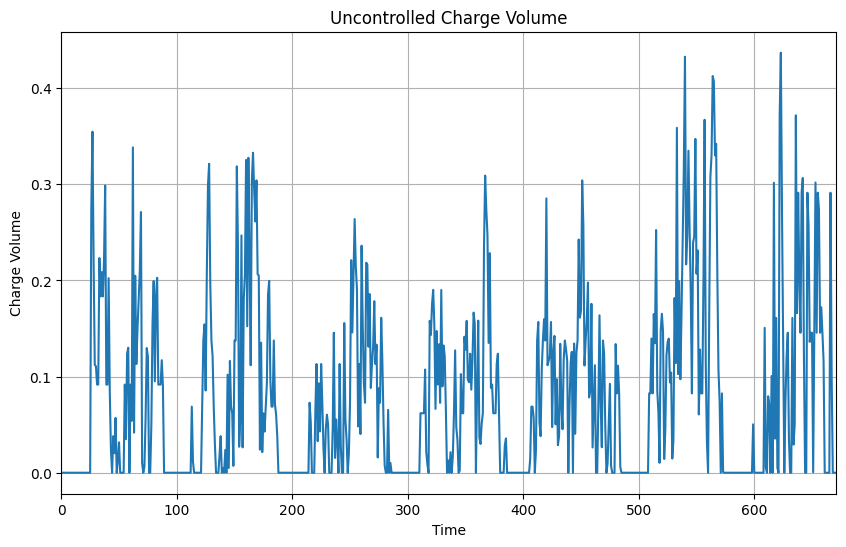

In [49]:
diary = DiaryBuilder(configs=configs, activities=flex.activities)
diary.create_diaries()


profiles = ProfileAggregator(configs=configs, activities=diary.activities, profiles=diary)
profiles.aggregate_profiles()

plt.figure(figsize=(10, 6))
plt.plot(profiles.uncontrolled_charging_weekly.index, profiles.uncontrolled_charging_weekly.iloc[:])  
plt.xlim(profiles.uncontrolled_charging_weekly.index[0], profiles.uncontrolled_charging_weekly.index[-1])
plt.title('Uncontrolled Charge Volume')
plt.xlabel('Time')
plt.ylabel('Charge Volume')
plt.grid(True)

plt.show()


To analyse its influence on the demand-side flexibility from EV, we will though charge the assumed size of the battery from 50 kWh to 100 kWh.

In [50]:
configs['user_config']['flexestimators']['battery_capacity'] = 20.0

Starting maximum battery level calculation.
Calculating maximum battery level for first activities.
Calculating maximum battery level for act 1.
Calculating maximum battery level for act 2.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:244: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  first_park_activities.loc[:, "max_battery_level_end_unlimited"] = (
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  first_park_activities.loc[:, "max_battery_level_end"] = first_park_activities.loc[:,
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:253: FutureWarning: In a future version, `df.iloc[:,

Calculating maximum battery level for act 3.
Calculating maximum battery level for act 4.
Calculating maximum battery level for act 5.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:343: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_battery_level_start"] = indeces_previous_park_activities.loc[
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:346: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_battery_level_end_unlimited"] = (
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:350: Fu

Calculating maximum battery level for act 6.
Calculating maximum battery level for act 7.
Calculating maximum battery level for act 8.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:343: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_battery_level_start"] = indeces_previous_park_activities.loc[
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:346: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_battery_level_end_unlimited"] = (
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:350: Fu

Calculating maximum battery level for act 9.
Calculating maximum battery level for act 10.
Calculating maximum battery level for act 11.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:343: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_battery_level_start"] = indeces_previous_park_activities.loc[
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:346: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_battery_level_end_unlimited"] = (
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:350: Fu

Calculating maximum battery level for act 12.
Starting minimum battery level calculation.
Calculate minimum battery level for last activities.
Calculate minimum battery level for act 12.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:350: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_battery_level_end"] = indeces_trip_activities.loc[
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:443: FutureWarning: In 

Calculate minimum battery level for act 11.
Calculate minimum battery level for act 10.
Calculate minimum battery level for act 9.
Calculate minimum battery level for act 8.
Calculate minimum battery level for act 7.
Calculate minimum battery level for act 6.
Calculate minimum battery level for act 5.
Calculate minimum battery level for act 4.
Calculate minimum battery level for act 3.
Calculate minimum battery level for act 2.
Calculate minimum battery level for act 1.
Calculate minimum battery level for act 0.
Finished iteration 1 / 10. Delta max battery level is 2144, delta min battery level is 5 and threshold epsilon is 0.
Starting maximum battery level calculation.
Calculating maximum battery level for first activities.
Calculating maximum battery level for act 1.
Calculating maximum battery level for act 2.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:253: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  first_park_activities.loc[:, "max_overshoot"] = (
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:274: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  first_trip_activities.loc[:, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the v

Calculating maximum battery level for act 3.
Calculating maximum battery level for act 4.
Calculating maximum battery level for act 5.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 6.
Calculating maximum battery level for act 7.
Calculating maximum battery level for act 8.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 9.
Calculating maximum battery level for act 10.
Calculating maximum battery level for act 11.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 12.
Finished iteration 1 / 10. Delta max battery level is 0, delta min battery level is 5 and threshold epsilon is 0.
Starting maximum battery level calculation.
Calculating maximum battery level for first activities.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:253: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  first_park_activities.loc[:, "max_overshoot"] = (
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:274: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will att

Calculating maximum battery level for act 1.
Calculating maximum battery level for act 2.
Calculating maximum battery level for act 3.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 4.
Calculating maximum battery level for act 5.
Calculating maximum battery level for act 6.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 7.
Calculating maximum battery level for act 8.
Calculating maximum battery level for act 9.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 10.
Calculating maximum battery level for act 11.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(


Calculating maximum battery level for act 12.
Finished iteration 2 / 10. Delta max battery level is 0, delta min battery level is 5 and threshold epsilon is 0.
Starting maximum battery level calculation.
Calculating maximum battery level for first activities.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:253: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  first_park_activities.loc[:, "max_overshoot"] = (
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:274: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will att

Calculating maximum battery level for act 1.
Calculating maximum battery level for act 2.
Calculating maximum battery level for act 3.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 4.
Calculating maximum battery level for act 5.
Calculating maximum battery level for act 6.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 7.
Calculating maximum battery level for act 8.
Calculating maximum battery level for act 9.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 10.
Calculating maximum battery level for act 11.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(


Calculating maximum battery level for act 12.
Finished iteration 3 / 10. Delta max battery level is 0, delta min battery level is 5 and threshold epsilon is 0.
Starting maximum battery level calculation.
Calculating maximum battery level for first activities.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:253: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  first_park_activities.loc[:, "max_overshoot"] = (
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:274: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will att

Calculating maximum battery level for act 1.
Calculating maximum battery level for act 2.
Calculating maximum battery level for act 3.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 4.
Calculating maximum battery level for act 5.
Calculating maximum battery level for act 6.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 7.
Calculating maximum battery level for act 8.
Calculating maximum battery level for act 9.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 10.
Calculating maximum battery level for act 11.
Calculating maximum battery level for act 12.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Finished iteration 4 / 10. Delta max battery level is 0, delta min battery level is 5 and threshold epsilon is 0.
Starting maximum battery level calculation.
Calculating maximum battery level for first activities.
Calculating maximum battery level for act 1.
Calculating maximum battery level for act 2.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:253: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  first_park_activities.loc[:, "max_overshoot"] = (
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:274: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  first_trip_activities.loc[:, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the v

Calculating maximum battery level for act 3.
Calculating maximum battery level for act 4.
Calculating maximum battery level for act 5.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 6.
Calculating maximum battery level for act 7.
Calculating maximum battery level for act 8.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 9.
Calculating maximum battery level for act 10.
Calculating maximum battery level for act 11.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 12.
Finished iteration 5 / 10. Delta max battery level is 0, delta min battery level is 5 and threshold epsilon is 0.
Starting maximum battery level calculation.
Calculating maximum battery level for first activities.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:253: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  first_park_activities.loc[:, "max_overshoot"] = (
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:274: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will att

Calculating maximum battery level for act 1.
Calculating maximum battery level for act 2.
Calculating maximum battery level for act 3.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 4.
Calculating maximum battery level for act 5.
Calculating maximum battery level for act 6.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 7.
Calculating maximum battery level for act 8.
Calculating maximum battery level for act 9.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 10.
Calculating maximum battery level for act 11.
Calculating maximum battery level for act 12.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Finished iteration 6 / 10. Delta max battery level is 0, delta min battery level is 5 and threshold epsilon is 0.
Starting maximum battery level calculation.
Calculating maximum battery level for first activities.
Calculating maximum battery level for act 1.
Calculating maximum battery level for act 2.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:253: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  first_park_activities.loc[:, "max_overshoot"] = (
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:274: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  first_trip_activities.loc[:, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the v

Calculating maximum battery level for act 3.
Calculating maximum battery level for act 4.
Calculating maximum battery level for act 5.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 6.
Calculating maximum battery level for act 7.
Calculating maximum battery level for act 8.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 9.
Calculating maximum battery level for act 10.
Calculating maximum battery level for act 11.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 12.
Finished iteration 7 / 10. Delta max battery level is 0, delta min battery level is 5 and threshold epsilon is 0.
Starting maximum battery level calculation.
Calculating maximum battery level for first activities.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:253: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  first_park_activities.loc[:, "max_overshoot"] = (
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:274: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will att

Calculating maximum battery level for act 1.
Calculating maximum battery level for act 2.
Calculating maximum battery level for act 3.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 4.
Calculating maximum battery level for act 5.
Calculating maximum battery level for act 6.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 7.
Calculating maximum battery level for act 8.
Calculating maximum battery level for act 9.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 10.
Calculating maximum battery level for act 11.
Calculating maximum battery level for act 12.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Finished iteration 8 / 10. Delta max battery level is 0, delta min battery level is 5 and threshold epsilon is 0.
Starting maximum battery level calculation.
Calculating maximum battery level for first activities.
Calculating maximum battery level for act 1.
Calculating maximum battery level for act 2.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:253: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  first_park_activities.loc[:, "max_overshoot"] = (
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:274: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  first_trip_activities.loc[:, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the v

Calculating maximum battery level for act 3.
Calculating maximum battery level for act 4.
Calculating maximum battery level for act 5.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 6.
Calculating maximum battery level for act 7.
Calculating maximum battery level for act 8.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 9.
Calculating maximum battery level for act 10.
Calculating maximum battery level for act 11.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 12.
Finished iteration 9 / 10. Delta max battery level is 0, delta min battery level is 5 and threshold epsilon is 0.
Starting maximum battery level calculation.
Calculating maximum battery level for first activities.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:253: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  first_park_activities.loc[:, "max_overshoot"] = (
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:274: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will att

Calculating maximum battery level for act 1.
Calculating maximum battery level for act 2.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 3.
Calculating maximum battery level for act 4.
Calculating maximum battery level for act 5.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 6.
Calculating maximum battery level for act 7.
Calculating maximum battery level for act 8.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.

Calculating maximum battery level for act 9.
Calculating maximum battery level for act 10.
Calculating maximum battery level for act 11.


C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(
C:\Users\jagm_li\Documents\vencopy_internal\vencopy\vencopy\core\flexestimators.py:361: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  indeces_trip_activities.loc[multi_index_trip, "max_residual_need"] = res.where(


Calculating maximum battery level for act 12.
Finished iteration 10 / 10. Delta max battery level is 0, delta min battery level is 5 and threshold epsilon is 0.
Technical flexibility estimation ended.
157 activities dropped from 1560 total activities because activity length equals zero.
Starting to discretise drain.
Discretisation finished for drain.
Needed time to discretise drain: 0.556816577911377.
Starting to discretise available_power.
Discretisation finished for available_power.
Needed time to discretise available_power: 0.5701162815093994.
Starting to discretise uncontrolled_charging.
Discretisation finished for uncontrolled_charging.
Needed time to discretise uncontrolled_charging: 0.6209986209869385.
Starting to discretise max_battery_level_start.
Discretisation finished for max_battery_level_start.
Needed time to discretise max_battery_level_start: 0.6120023727416992.
Starting to discretise min_battery_level_end.
Discretisation finished for min_battery_level_end.
Needed time 

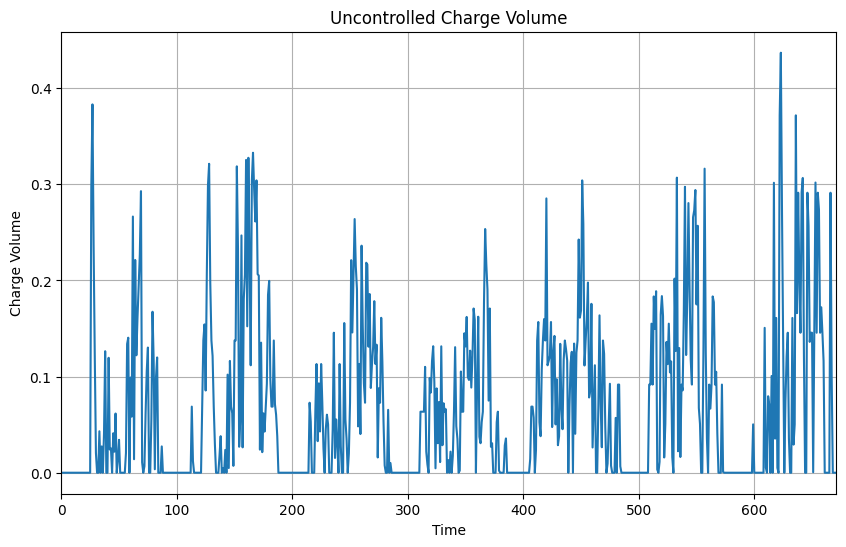

In [51]:
# Estimate charging flexibility based on driving profiles and charge connection
flex = FlexEstimator(configs=configs, activities=grid.activities)
flex.estimate_technical_flexibility_through_iteration()

diary = DiaryBuilder(configs=configs, activities=flex.activities)
diary.create_diaries()

profiles = ProfileAggregator(configs=configs, activities=diary.activities, profiles=diary)
profiles.aggregate_profiles()

plt.figure(figsize=(10, 6))
plt.plot(profiles.uncontrolled_charging_weekly.index, profiles.uncontrolled_charging_weekly.iloc[:])  
plt.xlim(profiles.uncontrolled_charging_weekly.index[0], profiles.uncontrolled_charging_weekly.index[-1])
plt.title('Uncontrolled Charge Volume')
plt.xlabel('Time')
plt.ylabel('Charge Volume')
plt.grid(True)

plt.show()

By reducing the battery capacity to 20 we can see from the graphs more flattend out curves, which results from vehicles charging less and reduced range of profiles that can be considerd.

## Next Steps

Come back, there will be more upcoming tutorials! :)